# Logistic Regression

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix

In [4]:
import pandas as pd
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [14]:
X = wine.iloc[:, :11]
y = wine.loc[:, 'quality']

In [15]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [16]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

### Scaling the input features using MinMaxScaler

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


### Splitting into train and test datasets using train_test_split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Print the new label
print(y_test_one_hot.shape)

(320, 9)


In [15]:
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='softmax'))
    
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = .2)

Epoch 1/10
4/4 [==============================] - 1s 96ms/step - loss: 0.0000e+00 - accuracy: 0.0891 - val_loss: 0.0000e+00 - val_accuracy: 0.0385
Epoch 2/10
4/4 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - accuracy: 0.0891 - val_loss: 0.0000e+00 - val_accuracy: 0.0385
Epoch 3/10
4/4 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 0.0891 - val_loss: 0.0000e+00 - val_accuracy: 0.0385
Epoch 4/10
4/4 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - accuracy: 0.0891 - val_loss: 0.0000e+00 - val_accuracy: 0.0385
Epoch 5/10
4/4 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.0891 - val_loss: 0.0000e+00 - val_accuracy: 0.0385
Epoch 6/10
4/4 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 0.0891 - val_loss: 0.0000e+00 - val_accuracy: 0.0385
Epoch 7/10
4/4 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - accuracy: 0.0891 - val_loss: 0.000

In [17]:
y_pred = model.predict(X_test)
y_pred = [1 if i >= 0.5 else 0 for i in y_pred]

1/1 [==============================] - 0s 108ms/step


In [24]:
# Confusion matrix

pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted Bream", "Predicted Pearch"], index=["Actual Bream","Actual Pearch"] )

,Predicted Bream,Predicted Pearch
Actual Bream,0,8
Actual Pearch,0,11


### Model Building and training

In [78]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
# training the model
logReg.fit(X_train, y_train)

LogisticRegression()

### Predicting the output

In [79]:
y_pred = logReg.predict(X_test)

### Computing the accuracy

In [80]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 81.25%


### Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

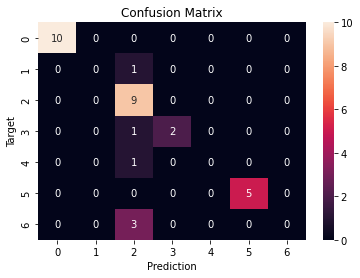

In [50]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

### Hyperparameter tuning


In [82]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore") 

# define models and parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear','saga','sag']
penalty = ['l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [83]:
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logReg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)


In [84]:
# summarize results
print("Best: %f using %s\n" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
print('Mean (Std Dev) with Parameters')
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.942949 using {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

Mean (Std Dev) with Parameters
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.942949 (0.063379) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.821795 (0.081394) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'sag'}
0.853419 (0.076829) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.853419 (0.076829) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.816667 (0.077165) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.808974 (0.069641) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.829701 (0.071663) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'lbfgs'}
0.845513